
Areawa Data Science Academy

Deep Learning Cohort 2.0 Name: Mustapha Abdulkadir Sani Email: mustapha.abdulkadir2205@gmail.com Title: Week 2 Solution

Exercises Solution



In [1]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt



In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [3]:
# Create the data parameters
weight=3
bias=9

# Make X and y using linear regression feature
start=0
end=1
step=0.01 # this enables us to create 100 datapoints
X=torch.arange(start, end, step).unsqueeze(dim=1)
y=weight*X+bias


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
y: tensor([[9.0000],
        [9.0300],
        [9.0600],
        [9.0900],
        [9.1200],
        [9.1500],
        [9.1800],
        [9.2100],
        [9.2400],
        [9.2700]])


In [4]:
# Split the data into training and testing
train_split=int(0.8*len(X)) # 80% of the data will be used for training and 20% for testing
X_train, y_train=X[:train_split], y[:train_split] # creating the train set
X_test, y_test=X[train_split:], y[train_split:] # creating the test set

# checking the lenght of the respective sets
len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

In [5]:
# Plot the training and testing data
# to achive this, we are going to create a function, so that we can
# re-use it any time we want to plot our training and testing data

def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=None):
  """
  Plots training data, test data and compares the predictions.
  """
  plt.figure(figsize=(10, 7))
  # plot training data using blue color
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # plot testing data using green color
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    # plot predictions using red color
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # show the legend
  plt.legend(prop={"size": 14})

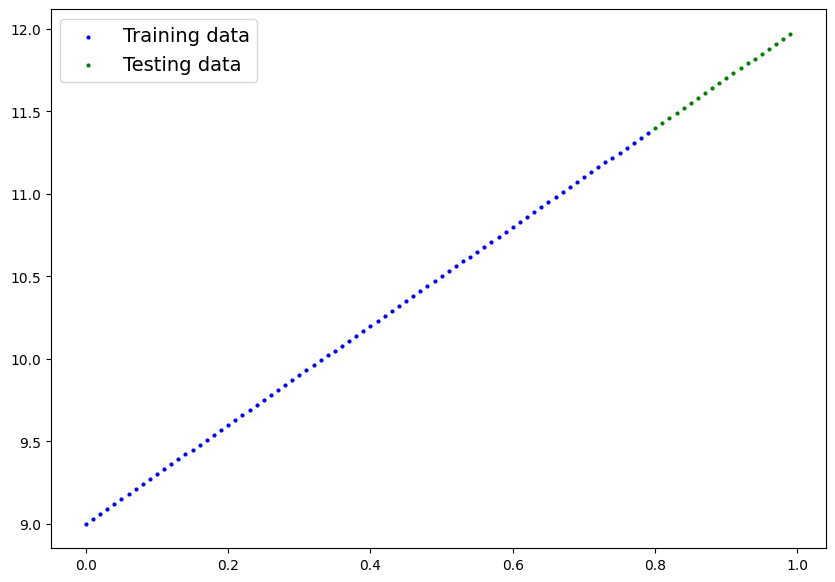

In [6]:
# invoking the function to plot the training and test data
plot_predictions()

## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [7]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))

    # implememts the forward function
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input data
    return self.weights * x + self.bias # our linear regression formula in code

In [8]:
# Instantiate the model and put it to the target device
model=LinearRegressionModel()
model.to(device)


LinearRegressionModel()

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [11]:
# Create the loss function and optimizer
loss_fn=nn.L1Loss() # loss function
optimizer=torch.optim.SGD(params=model.parameters(), lr=0.01) # optimizer

In [18]:
# Training loop
epochs=300 # set up number of epochs to 300

# Send data to target device
X_train=X_train.to(device)
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)

# Train model for 300 epochs
for epoch in range(epochs):
  ### Training

  # Put model in train mode
  model.train()

  # 1. Forward pass
  y_pred=model(X_train)

  # 2. Calculate loss
  loss=loss_fn(y_pred, y_train)

  # 3. Zero gradients
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Step the optimizer
  optimizer.step()

  ### Perform testing every 20 epochs
  if epoch % 20 == 0:

    # Put model in evaluation mode and setup inference context
    with torch.inference_mode():
      # 1. Forward pass
      test_pred=model(X_test)
      # 2. Calculate test loss
      test_loss=loss_fn(test_pred, y_test.type(torch.float))

      # Print out what's happening
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 3.108 | Test loss: 2.726
Epoch: 20 | Train loss: 2.876 | Test loss: 2.455
Epoch: 40 | Train loss: 2.645 | Test loss: 2.185
Epoch: 60 | Train loss: 2.414 | Test loss: 1.914
Epoch: 80 | Train loss: 2.183 | Test loss: 1.643
Epoch: 100 | Train loss: 1.951 | Test loss: 1.373
Epoch: 120 | Train loss: 1.720 | Test loss: 1.102
Epoch: 140 | Train loss: 1.489 | Test loss: 0.831
Epoch: 160 | Train loss: 1.258 | Test loss: 0.560
Epoch: 180 | Train loss: 1.027 | Test loss: 0.290
Epoch: 200 | Train loss: 0.795 | Test loss: 0.078
Epoch: 220 | Train loss: 0.572 | Test loss: 0.245
Epoch: 240 | Train loss: 0.452 | Test loss: 0.426
Epoch: 260 | Train loss: 0.396 | Test loss: 0.540
Epoch: 280 | Train loss: 0.366 | Test loss: 0.612


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [19]:
# Make predictions with the model
# set the model in the evaluation model
model.eval()

# set up the inference mode context manager
with torch.inference_mode():
  y_preds=model(X_test)

# view the predictions
y_preds

tensor([[11.8988],
        [11.9452],
        [11.9916],
        [12.0380],
        [12.0843],
        [12.1307],
        [12.1771],
        [12.2235],
        [12.2699],
        [12.3163],
        [12.3627],
        [12.4091],
        [12.4555],
        [12.5019],
        [12.5482],
        [12.5946],
        [12.6410],
        [12.6874],
        [12.7338],
        [12.7802]])

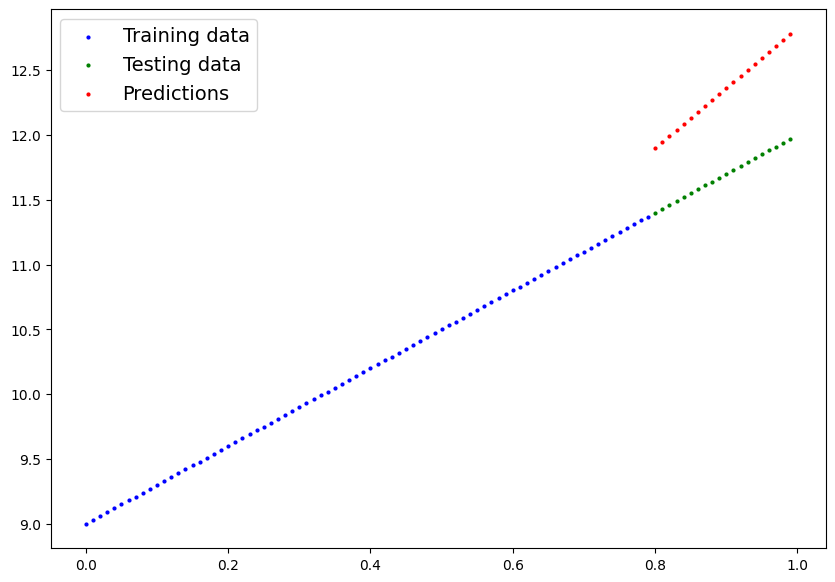

In [20]:
# Plot the predictions (these may need to be on a specific device)
# using the function I have created
plot_predictions(predictions=y_preds)

## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [21]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "02_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/02_pytorch_workflow_model.pth


In [22]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)
loaded_model=LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

<ipython-input-22-93fe1055fd77>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


LinearRegressionModel()

In [23]:
# Make predictions with loaded model and compare them to the previous
# put the loaded_model in the evaluation model
loaded_model.eval()

# use the inference context manager to make predictions
with torch.inference_mode():
  loaded_model_preds=loaded_model(X_test) # passing the X_test data

# view the loaded predictions
loaded_model_preds

tensor([[11.8988],
        [11.9452],
        [11.9916],
        [12.0380],
        [12.0843],
        [12.1307],
        [12.1771],
        [12.2235],
        [12.2699],
        [12.3163],
        [12.3627],
        [12.4091],
        [12.4555],
        [12.5019],
        [12.5482],
        [12.5946],
        [12.6410],
        [12.6874],
        [12.7338],
        [12.7802]])

In [24]:
# comparing the prediction of the original model and the loaded one
y_preds==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

we can see from the comparison the output of the models matched